<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

<ipython-input-1-7dd3504c366f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


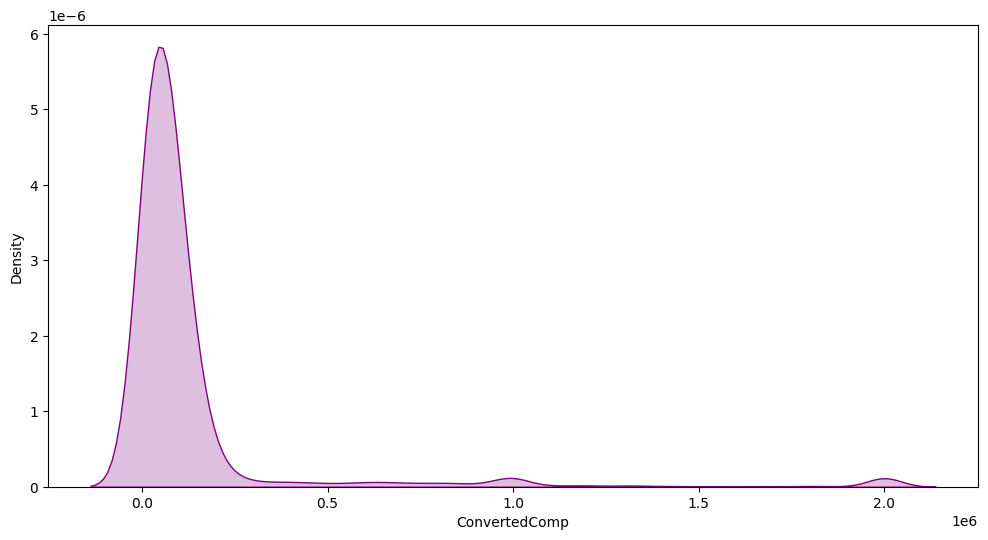

In [35]:
# your code goes here
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
data = df['ConvertedComp'].dropna()
sns.kdeplot(data, color='purple', fill=True)
plt.show()

Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:xlabel='ConvertedComp', ylabel='Count'>

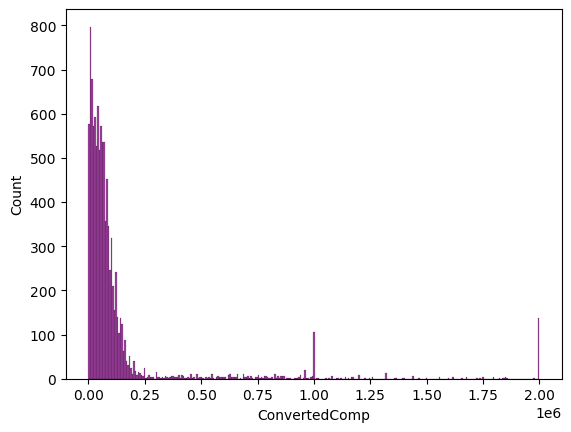

In [45]:
# your code goes here
sns.histplot(data, color='purple')

What is the median of the column `ConvertedComp`?


In [24]:
# your code goes here
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

How many responders identified themselves only as a **Man**?


In [25]:
# your code goes here
df['Gender'].value_counts()

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [46]:
# your code goes here
df[df['Gender'] == 'Woman']['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [27]:
five_number_summary = df['Age'].describe(percentiles=[.25, .5, .75])

min_age = five_number_summary['min']
q1_age = five_number_summary['25%']
median_age = five_number_summary['50%']
q3_age = five_number_summary['75%']
max_age = five_number_summary['max']

print("Five-Number Summary for Age:")
print(f"Minimum: {min_age}")
print(f"Q1 (25th percentile): {q1_age}")
print(f"Median (50th percentile): {median_age}")
print(f"Q3 (75th percentile): {q3_age}")
print(f"Maximum: {max_age}")

Five-Number Summary for Age:
Minimum: 16.0
Q1 (25th percentile): 25.0
Median (50th percentile): 29.0
Q3 (75th percentile): 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


<AxesSubplot:xlabel='Age', ylabel='Count'>

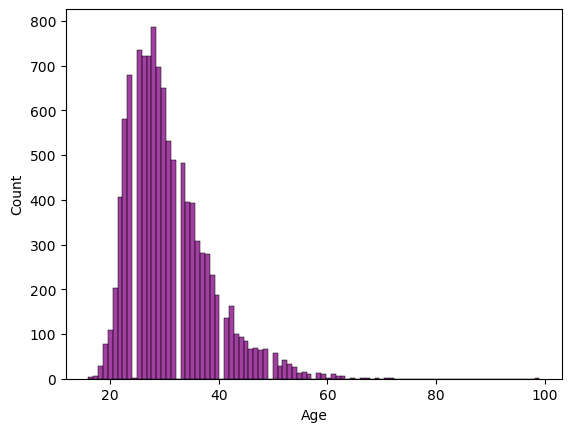

In [31]:
# your code goes here
age_data = df['Age']
sns.histplot(age_data, color='purple',)

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


The number of outliers below Q1 in Age is: 2096


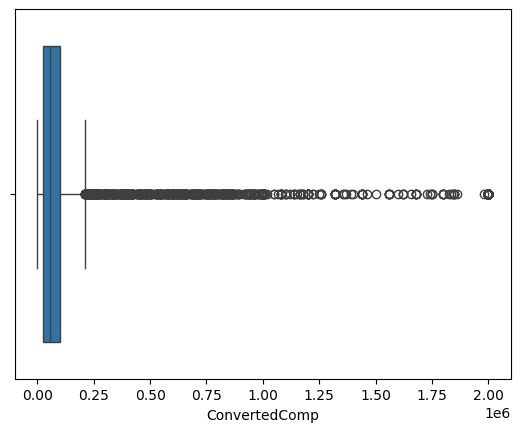

In [63]:
# your code goes here
sns.boxplot(x=df['ConvertedComp'])

Q1_age = age_data.quantile(0.25)
outliers_below_Q1 = age_data[age_data < Q1_age]
num_outliers_below_Q1 = outliers_below_Q1.count()
print(f"The number of outliers below Q1 in Age is: {num_outliers_below_Q1}")

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [49]:
# your code goes here
IQR = df['ConvertedComp'].quantile(0.75) - df['ConvertedComp'].quantile(0.25)
IQR
print(f"The Interquartile Range (IQR) for ConvertedComp is: {IQR}")

The Interquartile Range (IQR) for ConvertedComp is: 73132.0


Find out the upper and lower bounds.


In [50]:
# your code goes here
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"The lower bound for outliers is: {lower_bound}")
print(f"The upper bound for outliers is: {upper_bound}")

The lower bound for outliers is: -82830.0
The upper bound for outliers is: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [52]:
# your code goes here
outliers = data[(data < lower_bound) | (data > upper_bound)]
num_outliers = outliers.count()
print(f"The number of outliers in the ConvertedComp column is: {num_outliers}")

The number of outliers in the ConvertedComp column is: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [62]:
# your code goes here
new_df = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
print(new_df.head())

median_converted_comp = new_df['ConvertedComp'].median()
print(f"The median ConvertedComp after removing outliers is: {median_converted_comp}")

mean_converted_comp = new_df['ConvertedComp'].mean()
print(f"The mean ConvertedComp after removing outliers is: {mean_converted_comp}")

   Respondent                      MainBranch Hobbyist  \
0           4  I am a developer by profession       No   
1           9  I am a developer by profession      Yes   
2          13  I am a developer by profession      Yes   
4          17  I am a developer by profession      Yes   
5          19  I am a developer by profession      Yes   

                                         OpenSourcer  \
0                                              Never   
1                         Once a month or more often   
2  Less than once a month but more than once per ...   
4  Less than once a month but more than once per ...   
5                                              Never   

                                          OpenSource          Employment  \
0  The quality of OSS and closed source software ...  Employed full-time   
1  The quality of OSS and closed source software ...  Employed full-time   
2  OSS is, on average, of HIGHER quality than pro...  Employed full-time   
4  The qua

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [60]:
# your code goes here
df_numeric = df.select_dtypes(include=['number'])

correlation_matrix = df_numeric.corr()

if 'Age' in correlation_matrix.columns:
    age_correlation = correlation_matrix['Age']
    print("Correlation of Age with other numerical columns:")
    print(age_correlation)
else:
    print("The 'Age' column is not present in the numeric DataFrame.")

Correlation of Age with other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
